<a href="https://colab.research.google.com/github/Simalg/Simalg/blob/main/CatAlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import load_img, img_to_array

from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
directory = "/gdrive/MyDrive/cat database/images"

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = data_gen.flow_from_directory(
  directory,
  target_size=(224, 224),
  batch_size=16,
  class_mode='binary',
  subset='training',
  shuffle=True)

Found 518 images belonging to 2 classes.


In [ ]:
val_generator = data_gen.flow_from_directory(
  directory,
  target_size=(224, 224),
  batch_size=8,
  class_mode='binary',
  subset='validation',
  shuffle=False)

Found 128 images belonging to 2 classes.


In [ ]:
input_shape, num_classes = (224, 224, 3), 1

In [ ]:
input = Input(shape=input_shape)

x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(input)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Conv2D(256, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Conv2D(384, (3, 3), activation='relu')(x)
x = Conv2D(384, (3, 3), activation='relu')(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)

output_layer = Dense(num_classes, activation='sigmoid')(x)
model = Model(inputs=input, outputs=output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 384)         885120

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
fit_history = model.fit_generator(
    train_generator,
    epochs=100,
    validation_data=val_generator,
)

<ipython-input-14-6a2829a8601d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = model.fit_generator(


Epoch 1/100
33/33 [==============================] - 222s 6s/step - loss: 0.6931 - accuracy: 0.5116 - precision: 0.5158 - recall: 0.3784 - val_loss: 0.6927 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
33/33 [==============================] - 2s 52ms/step - loss: 0.6927 - accuracy: 0.5097 - precision: 0.6923 - recall: 0.0347 - val_loss: 0.6924 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
33/33 [==============================] - 2s 64ms/step - loss: 0.6924 - accuracy: 0.5386 - precision: 0.6351 - recall: 0.1815 - val_loss: 0.6921 - val_accuracy: 0.5078 - val_precision: 1.0000 - val_recall: 0.0156
Epoch 4/100
33/33 [==============================] - 2s 68ms/step - loss: 0.6921 - accuracy: 0.5946 - precision: 0.6150 - recall: 0.5058 - val_loss: 0.6919 - val_accuracy: 0.5078 - val_precision: 1.0000 - val_recall: 0.0156
Epoch 5/100
33/33 [==============================] - 3s 76ms/step - loss: 0.6917 - accur

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


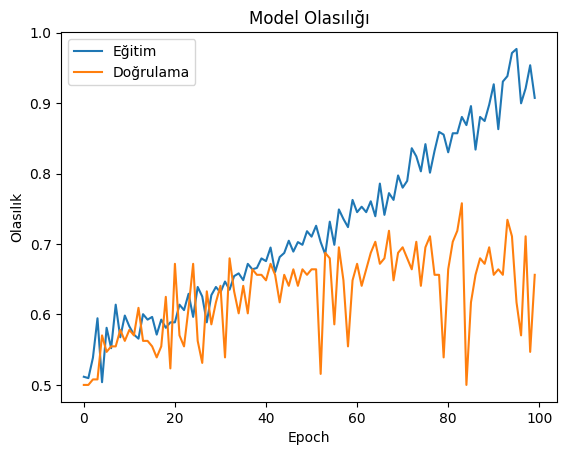

In [ ]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('Model Olasılığı')
plt.ylabel('Olasılık')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper left')
plt.show()

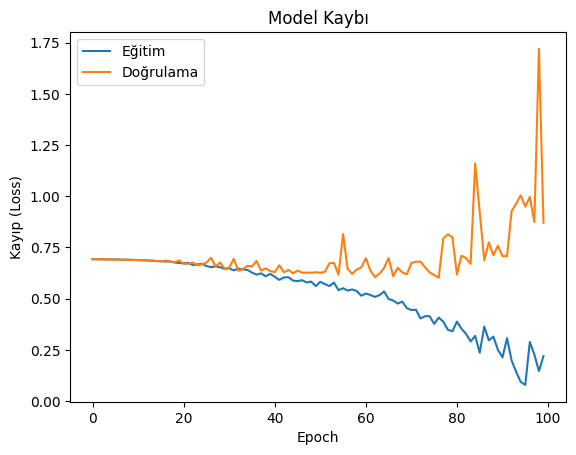

In [ ]:
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model Kaybı')
plt.ylabel('Kayıp (Loss)')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, precision, recall = model.evaluate(val_generator)

16/16 [==============================] - 0s 25ms/step - loss: 0.8702 - accuracy: 0.6562 - precision: 0.6515 - recall: 0.6719


In [ ]:
F1_Skoru = ((precision * recall) / (precision + recall)) * 2
F1_Skoru

0.6615384485030312

In [ ]:
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred = np.round(y_pred)
confusion_matrisi = confusion_matrix(y_true, y_pred)
print(confusion_matrisi)

16/16 [==============================] - 0s 18ms/step
[[41 23]
 [21 43]]
